# **BT thực hành 7.1: Confidence Interval và Levels**


> Cập nhật: **07/2023**



In [6]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Colab Notebooks/Data Mining/Thống kê suy diễn'

Mounted at /content/gdrive


In [7]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sbn
import scipy.stats       as st
import warnings
warnings.filterwarnings('ignore')

---
## **Yêu cầu 1:**
1. Tính SEM của mẫu số liệu có kích thước là 45 và độ lệch chuẩn là 38.
2. Tính SEM của mẫu số liệu {14, 8, 11, 12, 16, 10}.
3. Tính SEM của mẫu số liệu điểm IQ: {96, 104, 126, 134, 140}.
---

In [8]:
## 1. Tính SEM của MẪU số liệu có kích thước là 45 và độ lệch chuẩn là 38.
std = 38
n   = 45
SEM = std / (n ** 0.5) ##SEM: Sai số chuẩn
SEM

5.664705542999467

In [9]:
## 2. Tính SEM của MẪU số liệu {14, 8, 11, 12, 16, 10}.
## https://numpy.org/doc/stable/reference/generated/numpy.std.html
##    Hàm numpy.std() có tham số ddof (DELTA degrees of freedom)
##    ==> mẫu số dof = (N -  ddof)
##           Quần thể: ddof = 0 (default)
##           Mẫu     : ddof = 1
data = np.array([14, 8, 11, 12, 16, 10])

## Trường hợp MẪU dữ liệu
std  = np.std(data, ddof = 1)
print('SEM (sample)     =', std / (data.size ** 0.5))

## Trường hợp QUẦN THỂ
std  = np.std(data, ddof = 0) ## default
print('SEM (population) =', std / (data.size ** 0.5))

SEM (sample)     = 1.166666666666667
SEM (population) = 1.065016084037823


In [10]:
## Sử dụng hàm scipy.stats.sem()
print('SEM (sample)     =', st.sem(data, ddof = 1)) # ddof = 1 (default !) (mẫu)
print('SEM (population) =', st.sem(data, ddof = 0)) # ddof = 0 (tổng thể)

SEM (sample)     = 1.166666666666667
SEM (population) = 1.065016084037823


In [11]:
## 3. Tính SEM của MẪU số liệu điểm IQ: {96, 104, 126, 134, 140}.
IQ  = np.array([96, 104, 126, 134, 140])
std = np.std(IQ, ddof = 1)

std / (IQ.size ** .5), st.sem(IQ) # default ddof = 1

(8.555699854482976, 8.555699854482976)

---
## **Yêu cầu 2:**
> Lấy mẫu ngẫu nhiên 40 người đàn ông và có được chiều cao trung bình là 175cm với độ lệch chuẩn (quần thể) là 20cm. Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%.
---

In [13]:
## Tạo mẫu dữ liệu giả lập cho 40 người
xBar = 175
std  = 20
n    = 40
while True:
    heights = np.random.normal(xBar, std, n)
    if abs(xBar - np.mean(heights)) < 0.01: # mẫu DL có độ lệch nhỏ
        break
print(heights)

[137.63019376 182.95912082 141.09658133 206.10593855 182.61037384
 162.45592162 165.87027811 165.54032388 167.95717704 191.73092398
 167.85787785 175.99517269 177.85497094 157.72573299 204.96840962
 175.38915837 161.47272831 174.84684422 211.01500173 168.97543425
 222.27848522 191.39867021 154.99659876 185.0299105  183.76848976
 162.48829887 178.39561949 158.86547676 159.03120254 162.0298593
 191.21065929 206.6852533  179.99488838 185.72856455 147.11583611
 132.23979865 153.46743063 185.31516046 207.72527133 171.83271963]


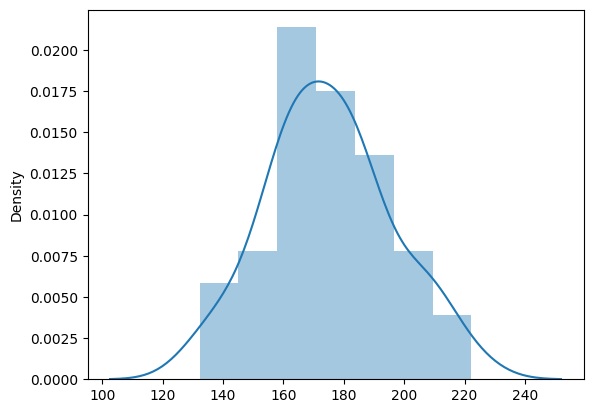

In [14]:
## Biểu diễn trực quan dữ liệu
sbn.distplot(heights, kde = True)
plt.show()

In [15]:
## Hàm tính khoảng tin cậy theo phân phối Z
def confidence_interval_Z(data, confidence_level):
    n    = len(data)
    mean = data.mean()
    std  = data.std(ddof = 0)

    r    = (st.norm.ppf((1 + confidence_level) / 2)) * (std / (n ** 0.5))
    return np.array([mean - r, mean + r])

In [16]:
## Xác định khoảng tin cậy
confidence_level = 0.95
CI               = confidence_interval_Z(heights, confidence_level)
print(f'Ước lượng điểm: {heights.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 174.99
Khoảng tin cậy: [168.67, 181.32] (với alpha = 0.05)


---
## **Yêu cầu 3:**
> Lấy mẫu ngẫu nhiên 100 cây giống có chiều cao trung bình là 7.5 inch và độ lệch chuẩn (MẪU) là 2.3 inch. Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%. Vẽ biểu đồ histogram.
---

**ppf: tra ngược, đưa xác suất ⇒ trả về ngưỡng**

**pmf, cdf: tra xuôi, đưa ngưỡng ⇒ trả về xác suất**

**interval: ra kết quả khoảng tin cậy**

**1-cdf ⇔ sf**

In [17]:
## Tạo mẫu ngẫu nhiên theo đề bài
xBar = 7.5
std  = 2.3
n    = 100
heights = np.random.normal(xBar, std, n)

print(heights[:10])

[ 8.63461775  9.85729795 11.09257753  7.94203264  5.22821775  7.93101564
  5.56984438  8.63041999  7.17438351  6.48263658]


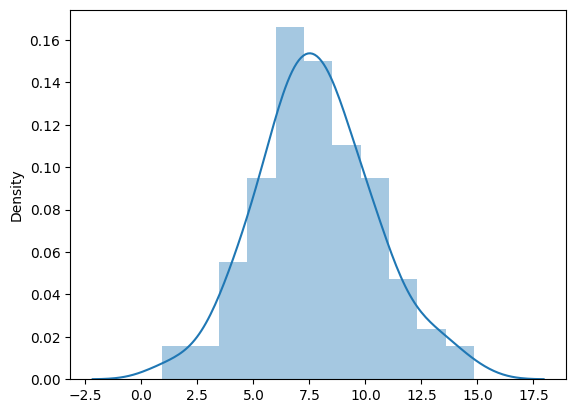

In [18]:
## Biểu diễn trực quan dữ liệu
sbn.distplot(heights, kde = True)
plt.show()

In [19]:
## Hàm tính khoảng tin cậy theo phân phối T
def confidence_interval_T(data, confidence_level):
    n    = len(data)
    mean = data.mean()
    r    = st.t.ppf((1 + confidence_level) / 2, n - 1) * st.sem(data, ddof = 1)

    return np.array([mean - r, mean + r])

In [20]:
## Xác định khoảng tin cậy
confidence_level = 0.95
CI               = confidence_interval_T(heights, confidence_level)
print(f'Ước lượng điểm: {data.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 11.83
Khoảng tin cậy: [7.28, 8.31] (với alpha = 0.05)


In [21]:
## Sử dụng hàm st.t.interval()
CI = st.t.interval(confidence = confidence_level, df = 99, loc = np.mean(heights), scale = st.sem(heights))
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Khoảng tin cậy: [7.28, 8.31] (với alpha = 0.05)


---
## **Yêu cầu 4:**
Tập tin Normtemp.txt chứa dữ liệu về thân nhiệt, giới tính và nhịp tim của 130 người (nguồn: Journal of Statistics Education, Shoemaker 1996). Xem xét cột dữ liệu đầu tiên (Temperature). Xác định khoảng tin cậy tương ứng với mức độ tin cậy 95%.

---

In [23]:
## Đọc tập tin dữ liệu
data = pd.read_csv(folder + "/Normtemp.txt", header = None, sep = ' ')

In [24]:
## Lấy cột dữ liệu đầu tiên (Temperature)
tempt = data[0]
tempt.head()

,0
0,96.3
1,96.7
2,96.9
3,97.0
4,97.1


In [25]:
## Ước lượng điểm, ước lượng khoảng
confidence_level = 0.95
CI               = confidence_interval_Z(tempt, confidence_level)
print(f'Ước lượng điểm: {tempt.mean():.2f}')
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Ước lượng điểm: 98.25
Khoảng tin cậy: [98.12, 98.37] (với alpha = 0.05)


In [26]:
## Sử dụng hàm st.norm.interval()
CI = st.norm.interval(confidence = confidence_level, loc = np.mean(tempt), scale = st.sem(tempt))
print(f'Khoảng tin cậy: [{(CI[0]):.2f}, {(CI[1]):.2f}] (với alpha = {1 - confidence_level:.2f})')

Khoảng tin cậy: [98.12, 98.38] (với alpha = 0.05)
